# Three Mirror Anastigmat with Rectangular Apertures

This notebook demonstrates how to add rectangular apertures to the Three Mirror Anastigmat (TMA) system in Optiland.

Rectangular apertures are useful for:
- Simulating detector chips with rectangular geometry
- Modeling slit apertures in the optical path
- Non-rotational optical systems
- Physical clipping of rays at specific surfaces

## Import Required Libraries

In [11]:
import numpy as np
from optiland import analysis, optic
from optiland.physical_apertures.rectangular import RectangularAperture

## Setup the Three Mirror Anastigmat System

In [ ]:
# ============================================================================
# INITIALIZE THE OPTIC SYSTEM
# ============================================================================

focal_length = 100  # [mm]
lens = optic.Optic(name="TMA with Rectangular Apertures")

# System aperture (entrance pupil diameter)
lens.set_aperture(aperture_type="EPD", value=10)

# Field definition (angular)
lens.set_field_type(field_type="angle")
lens.add_field(y=0)
lens.add_field(y=+1.5)
lens.add_field(y=-1.5)

# Wavelengths
lens.add_wavelength(value=0.486)
lens.add_wavelength(value=0.587, is_primary=True)
lens.add_wavelength(value=0.656)

print("✓ Optical system initialized")

✓ Optical system initialized


## Define Surfaces

In [20]:
# ============================================================================
# DEFINE SURFACES
# ============================================================================

# Surface 0: Object plane (at infinity)
lens.add_surface(index=0, radius=np.inf, thickness=np.inf)

# Surface 1: Primary mirror (M1) - Stop surface
lens.add_surface(
    index=1,
    radius=-100,
    thickness=-20,
    conic=0,
    material="mirror",
    rx=np.radians(-15.0),
    is_stop=True,
    surface_type="zernike",
    coefficients=[],
)

# Surface 2: Secondary mirror (M2)
lens.add_surface(
    index=2,
    radius=-100,
    thickness=+20,
    conic=0,
    material="mirror",
    rx=np.radians(-10.0),
    dy=-11.5,
    surface_type="zernike",
    coefficients=[],
)

# Surface 3: Tertiary mirror (M3)
lens.add_surface(
    index=3,
    radius=-100,
    thickness=-22,
    conic=0,
    material="mirror",
    rx=np.radians(-1.0),
    dy=-15,
    surface_type="zernike",
    coefficients=[],
)

# Surface 4: Image plane (detector)
lens.add_surface(index=4, dy=-19.3)

# Update paraxial properties
lens.update_paraxial()

print("✓ All surfaces defined")

✓ All surfaces defined


## Add Rectangular Apertures

In [14]:
# ============================================================================
# ADD RECTANGULAR APERTURES
# ============================================================================

# Example 1: Rectangular aperture on the detector (image plane, surface 4)
# Define aperture in the local coordinate system: x_min, x_max, y_min, y_max
# This could represent a sensor array or detector chip
detector_aperture = RectangularAperture(
    x_min=-2.0,  # mm
    x_max=+2.0,  # mm
    y_min=-1.5,  # mm
    y_max=+1.5,  # mm
)
lens.surface_group.surfaces[4].aperture = detector_aperture

print("✓ Rectangular aperture added to detector (surface 4)")
print(f"  Aperture size: X: [-2.0, +2.0] mm, Y: [-1.5, +1.5] mm")

✓ Rectangular aperture added to detector (surface 4)
  Aperture size: X: [-2.0, +2.0] mm, Y: [-1.5, +1.5] mm


In [15]:
# Example 2 (Optional): Add a rectangular slit aperture on M2
# This could represent a masking element or slit in the optical path
slit_aperture = RectangularAperture(
    x_min=-3.5,  # mm
    x_max=+3.5,  # mm
    y_min=-1.0,  # mm  (narrow in Y, wide in X - slit-like)
    y_max=+1.0,  # mm
)
lens.surface_group.surfaces[2].aperture = slit_aperture

print("✓ Rectangular slit aperture added to M2 (surface 2)")
print(f"  Aperture size: X: [-3.5, +3.5] mm, Y: [-1.0, +1.0] mm")

✓ Rectangular slit aperture added to M2 (surface 2)
  Aperture size: X: [-3.5, +3.5] mm, Y: [-1.0, +1.0] mm


## Display System Configuration

In [16]:
# ============================================================================
# DISPLAY SYSTEM INFORMATION
# ============================================================================

print("\n" + "="*60)
print("SYSTEM CONFIGURATION")
print("="*60)
lens.info()


SYSTEM CONFIGURATION
╒════╤═══════════════════════════╤═══════════╤══════════╤═════════════╤════════════╤═════════╤═════════════════╕
│    │ Type                      │ Comment   │   Radius │   Thickness │ Material   │   Conic │   Semi-aperture │
╞════╪═══════════════════════════╪═══════════╪══════════╪═════════════╪════════════╪═════════╪═════════════════╡
│  0 │ Planar                    │           │      inf │         inf │ Air        │       0 │         5       │
│  1 │ Stop - Zernike Polynomial │           │     -100 │         -20 │ Mirror     │       0 │         5       │
│  2 │ Zernike Polynomial        │           │     -100 │          20 │ Mirror     │       0 │         3.52372 │
│  3 │ Zernike Polynomial        │           │     -100 │         -22 │ Mirror     │       0 │         3.45692 │
│  4 │ Planar                    │           │      inf │         nan │ Air        │       0 │         1.8624  │
╘════╧═══════════════════════════╧═══════════╧══════════╧═════════════╧═══

## Visualization: 2D Layout


Generating 2D layout...


(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'TMA with Rectangular Apertures'}, xlabel='Z [mm]', ylabel='Y [mm]'>)

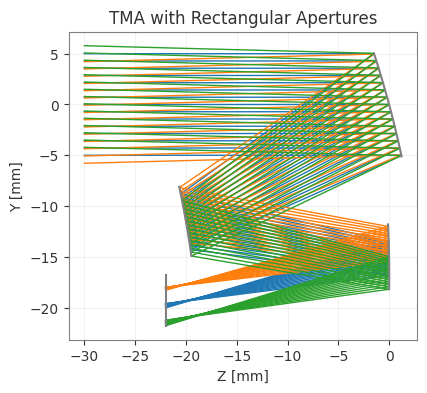

In [21]:
# Draw the system in 2D
print("\nGenerating 2D layout...")
lens.draw(title=lens.name, num_rays=15)

## Analysis: Spot Diagram


Generating spot diagram analysis...


/home/mike/temp/testing-optiland/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mike/temp/testing-optiland/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation maximum which has no identity

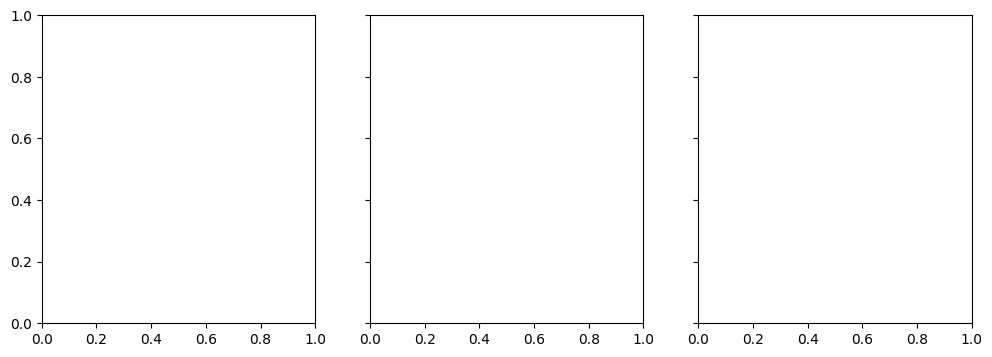

In [18]:
# Perform spot diagram analysis
print("\nGenerating spot diagram analysis...")
spot = analysis.SpotDiagram(lens)
spot.view()

## Additional Analysis (Optional)

You can perform additional analyses with Optiland:
- Ray aberration fans
- PSF (Point Spread Function)
- Wavefront analysis
- 3D visualization

Uncomment and modify the examples below as needed.

In [ ]:
# Example: Ray Aberration Analysis
# ray_abbe = analysis.RayAberrationFan(lens, direction='tangential')
# ray_abbe.view()

# Example: Field Dependence
# field_dep = analysis.FieldDependence(lens)
# field_dep.view()

print("\n" + "="*60)
print("✓ Rectangular apertures successfully applied to TMA!")
print("="*60)